# Sprint 10 - Deep Neural Network

**In this task we are going to build Neural Network from scratch**
* Well, there are many deep learning libraries(Keras, TensorFlow, PyTorch etc) that can be used to create a neural network
* For this task we will only be using numpy, pandas and keras
* **Note:** Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models
* Also we are using the **MNIST datasate which will use to validate the scratch neural network.

**But before we dive right into our task, let know the main ideas behind the neural networks, and we will start implementing these ideas into code. We will later relate to our task**


### Example
* We will start by importing all the required libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt

> **The first step in building our neural network will be to initialize the parameters. We need to initialize two parameters for each of the neurons in each layer: 1) Weight and 2) Bias**
* **These weights and biases are declared in vectorized form. That means that instead of initializing weights and biases for each individual neuron in every single layer, we will create a vector (or a matrix) for weights and another one for biases, for each layer.**
* **These weights and bias vectors will be combined with the input to the layer. Then we will apply the sigmoid function over that combination and send that as the input to the next layer.**
* **layer_dims holds the dimensions of each layer. We will pass these dimensions of layers to the init_parms function which will use them to initialize parameters. These parameters will be stored in a dictionary called params. So in the params dictionary params['W1'] will represent the weight matrix for layer 1.**

In [47]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

>**We have now initialized the weights and biases and now we will define the sigmoid function. It will compute the value of the sigmoid function (You will also this sigmoid and other function use later in our task) for any given value of Z and will also store this value as a cache. We will store cache values because we need them for implementing backpropagation. The Z here is the linear hypothesis.**
* Note that the sigmoid function falls under the class of activation functions in the neural network terminology. The job of an activation function is to shape the output of a neuron.
* **For example**, the sigmoid function takes input with discrete values and gives a value which lies between zero and one. Its purpose is to convert the linear outputs to non-linear outputs. There are different types of activation functions that can be used for better performance but we will stick to sigmoid for this example.

In [58]:
# Z (linear hypothesis) - Z = W*X + b , 
# W - weight matrix, b- bias vector, X- Input 

def sigmoid(Z):
	A = 1/(1+np.exp(np.dot(-1, Z)))
    
    

> **Mind you in the task you will also come across forward propagation**  Now lets also look at it here**

**forward-propagation calculate an output from a neural network by propagating an input signal through each layer until the output layer outputs its values.**
* **This is the technique we will need to generate predictions during training that will need to be corrected, and it is the method we will need after the network is trained to make predictions on new data.**
* Now, let's start writing code for forward propagation. We have discussed earlier that forward propagation will take the values from the previous layer and give it as input to the next layer. The function below will take the training data and parameters as inputs and will generate output for one layer and then it will feed that output to the next layer and so on.

In [59]:
def forward_prop(X, params):
    
    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(1, L+1):
        A_prev = A
        
        # Linear Hypothesis
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 
        
        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    return A, caches

> **A_prev is input to the first layer. We will loop through all the layers of the network and will compute the linear hypothesis. After that it will take the value of Z (linear hypothesis) and will give it to the sigmoid activation function. Cache values are stored along the way and are accumulated in caches. Finally, the function will return the value generated and the stored cache.**

> Let's now define our cost function.

In [1]:
def cost_function(A, Y):
    m = Y.shape[1]
    
    cost = (-1/m)*(np.dot(np.log(A), Y.T) + np.dot(log(1-A), 1-Y.T)) 
    
    return cost

> **As the value of the cost function decreases, the performance of our model becomes better. The value of the cost function can be minimized by updating the values of the parameters of each of the layers in the neural network. Algorithms such as Gradient Descent are used to update these values in such a way that the cost function is minimized.**
* **Gradient Descent updates the values with the help of some updating terms. These updating terms called gradients are calculated using the backpropagation. Gradient values are calculated for each neuron in the network and it represents the change in the final output with respect to the change in the parameters of that particular neuron.**


In [2]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = dA*sigmoid(Z)*(1-sigmoid(Z)) # The derivative of the sigmoid function
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

> The code above runs the backpropagation step for one single layer. It calculates the gradient values for sigmoid units of one layer using the cache values we stored previously. In the activation cache we have stored the value of Z for that layer. Using this value we will calculate the dZ, which is the derivative of the cost function with respect to the linear output of the given neuron.
* Once we have calculated all of that, we can calculate dW, db and dA_prev, which are the derivatives of cost function with respect the weights, biases and previous activation respectively. I have directly used the formulae in the code. If you are not familiar with calculus then it might seem too complicated at first. But for now think about it as any other math formula.
* After that we will use this code to implement backpropagation for the entire neural network. The function backprop implements the code for that. Here, we have created a dictionary for mapping gradients to each layer. We will loop through the model in a backwards direction and compute the gradient.

In [3]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L-1)], grads['db'+str(L-1)] = one_layer_backward(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

> **Once, we have looped through all the layers and computed the gradients, we will store those values in the grads dictionary and return it.**
* **Finally, using these gradient values we will update the parameters for each layer. The function update_parameters goes through all the layers and updates the parameters and returns them.**

In [4]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] -learning_rate*grads['W'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] -  learning_rate*grads['b'+str(l+1)]
        
    return parameters

**Finally, it's time to put it all together. We will create a function called train for training our neural network**

In [5]:
def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []
    
    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        
        params = update_parameters(params, grads, lr)
        
        
    return params, cost_history

This function will go through all the functions step by step for a given number of epochs. After finishing that, it will return the final updated parameters and the cost history. Cost history can be used to evaluate the performance of your network architecture.

Here ends our **EXAMPLE**. so what I suggest you to do is to try playing around with the code. You might get some more insights out of it and maybe you might find some errors in the code too.

**Please Note**
* The weight initialization and the activation function of deep neural networks have a crucial impact on the performance of the training procedure. An inappropriate selection can lead to the loss of information of the input during forward propagation and the exponential vanishing/exploding of gradients during back-propagation

```
I Know you must have had the basic about creating neural network from scratch.
So lets dive into our task
```

**Here is the code that download the dataset**

In [30]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Now before we create our first neural network we will start to work on the dataset by doing the following:** 
* Check the dataset
* Smoothing
* Visualization of image data
* Preprocessing

> **Check the dataset**

In [17]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

We have now seen that Each data is a 28x28 pixel black and white image

> **Smoothing**

* **Each image of (1, 28, 28) is transformed into (1, 784). This is the form that we will use in the machine learning methods we have learned so far, and in the neural network we will use in this article, which is a fully coupled layer only. The fact that all pixels are in a single row is described as flatten**

In [18]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

> **Visualization of image data**
* As we know our dataset contains images so we will now visualize to seehow it look like

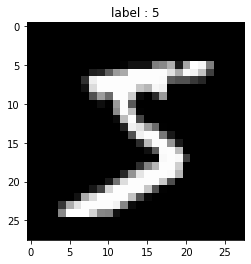

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

**Development Topic:** 
* Image data is usually held as an unsigned 8-bit integer of type uint8, butplt.imshowcan display a more flexible array as an image. For example, the following floating point of type float64 with a negative value will not cause an error and will be displayed in exactly the same way as before

<ipython-input-20-512baf593682>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = image.astype(np.float) # Convert to float type


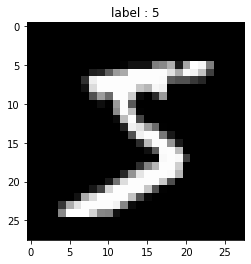

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [20]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

This is because it is designed to automatically convert a value to an integer from 0 to 255 for processing. Even if it is a uint8 type, if the minimum value is 0 and the maximum value is not 255, the hue will be strange. To prevent this, enter the argument as follows.

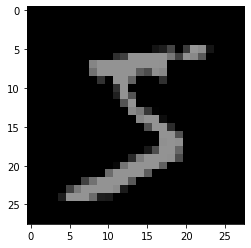

In [21]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

This automatic scaling can produce unexpected results in image-related libraries, so be sure to check when using the new method

> **Preprocessing**
* An image is represented by a uint8 type of 0 to 255, but in machine learning it will be handled as a float type of 0 to 1. It can be converted with the following code.

In [22]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

<ipython-input-22-c6e824832d96>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
<ipython-input-22-c6e824832d96>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)


1.0
0.0


**We have Also, the correct label is an integer between 0 and 9, which is converted to one-hot expression for multi-class classification in neural networks. scikit-learn'sOneHotEncoderis used in the code below. The value in this one-hot representation is treated as a float because it indicates the probability of being that label**

* **The use of OneHotEncoder**

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


**In addition, divide 20% of the 60,000 training data as verification data. The training data will be 48,000 and the verification data will be 12,000**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

### After we have work on the dataset and also the preprocessing of the dataset, we now create our Neural Network from scratch

### Model

In [41]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.verbose:
            When #verbose is set to True, the learning process etc. is output.
            print()
        pass
    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        pass
        return

* **The beginning of the program, we just defines libraries and import the dataset**

In [39]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## [Problem 1]

In [40]:
class FC:
    
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        self.optimizer = optimizer
        self.HW = 0
        self.HB = 0
        
    def forward(self, X):
        self.Z = X
        self.A = X @ self.W + self.B
        return self.A
    
    def backward(self, dA):
        self.dB = np.sum(dA, axis=0)
        self.dW = self.Z.T @ dA
        self.dZ = dA @ self.W.T
        self = self.optimizer.update(self)
        return self.dZ

## [Problem 2]

In [6]:
class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

# [Problem 3]

In [7]:
class SGD:
    
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer

## [Problem 4]

In [8]:
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA

In [9]:
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA

In [10]:
class softmax:

    def forward(self, A): 
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z
        
    def backward(self, Z, y):
        dA = Z - y
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA, loss

## [Problem 5]

In [11]:
class ReLU:

    def forward(self, A):
        self.A = A
        Z = np.maximum(0, A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * np.where(self.A > 0, 1, 0)
        return dA

## 【Problem 6】

In [13]:
class XavierInitializer:
    
    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

In [15]:
class HeInitializer:

    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

## 【Problem 7】

In [18]:
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr 
    
    def update(self, layer):
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB
        delta = 1e-7 
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + delta) / len(layer.Z)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.HB) + delta) / len(layer.Z)
        return layer

## Problem 8

In [19]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [33]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = [] 
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A1 = self.FC1.forward(mini_X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                #print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                dA3, loss = self.activation3.backward(Z3, mini_y) 
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) 

            if self.verbose:
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)            
                self.loss_train.append(self.activation3.backward(Z3, y)[1])
                
                if X_val is not None:
                    A1 = self.FC1.forward(X_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)            
                    self.loss_val.append(self.activation3.backward(Z3, y_val)[1])
    
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return np.argmax(Z3, axis=1)

## Problem 9

In [27]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [30]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [34]:
SDNN = ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU) 

SDNN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

In [36]:
pred = SDNN.predict(X_val)
accuracy_score(y_val, pred)

0.9810833333333333

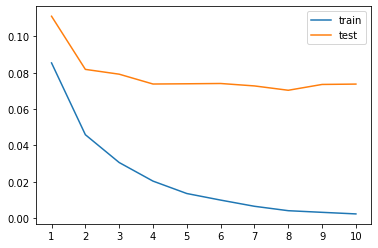

In [40]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_train, label='train')
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

- Let's check the accuracy with other layers. We have tested with three layers, let's check for 4 and 6 layers.

In [66]:
class ScratchDeepNeuralNetrowkClassifier_4():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation4 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation4.backward(self.Z4, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation4.backward(self.Z4, y_val)[1])
    
    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        self.Z4 = self.activation4.forward(A4)
        
    def backward(self, y):
        dA4, self.loss = self.activation4.backward(self.Z4, y) 
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z4, axis=1) 

In [67]:
SDNN4 = ScratchDeepNeuralNetrowkClassifier_4(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN4.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN4.predict(X_val)
accuracy_score(y_val, pred)

0.97975

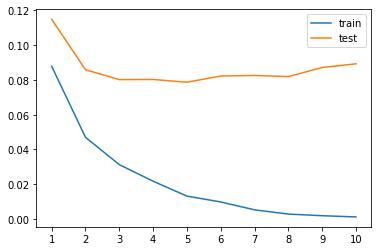

In [68]:
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_train, label='train')
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN4.epoch+1)));

In [70]:
class ScratchDeepNeuralNetrowkClassifier_6():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_nodes4 = 100 
        self.n_nodes5 = 50 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), optimizer)
        self.activation4 = self.activater()
        self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), optimizer)
        self.activation5 = self.activater()
        self.FC6 = FC(self.n_nodes5, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation6 = softmax()
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation6.backward(self.Z6, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation6.backward(self.Z6, y_val)[1])
    
    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)
        A5 = self.FC5.forward(Z4)
        Z5 = self.activation5.forward(A5)
        A6 = self.FC6.forward(Z5)
        self.Z6 = self.activation6.forward(A6)
        
    def backward(self, y):
        dA6, self.loss = self.activation6.backward(self.Z6, y) 
        dZ5 = self.FC6.backward(dA6)
        dA5 = self.activation5.backward(dZ5)
        dZ4 = self.FC5.backward(dA5)
        dA4 = self.activation4.backward(dZ4)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z6, axis=1)  

In [71]:
SDNN6 = ScratchDeepNeuralNetrowkClassifier_6(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN6.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN6.predict(X_val)
accuracy_score(y_val, pred)

0.9799166666666667

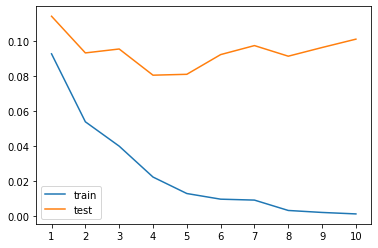

In [72]:
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_train, label='train')
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN6.epoch+1)));

- In conclusion, we can say that the accuracy was at its best when we had three layers.

Let's finally generalize the ScratchDeepNeuralNetrowkClassifier and make it possible to input layers with the number of nodes.

In [75]:
class General_ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU, n_nodes=None):
        self.verbose = verbose
        self.batch_size = 20 
        self.sigma = 0.02
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
        self.n_nodes = n_nodes 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = [] 
        self.loss_val = [] 
        optimizer = self.optimizer(self.lr)
        self.fcs = [] 
        self.act = [] 
        
        for i in range(len(self.n_nodes)-2):
            self.fcs.append(FC(self.n_nodes[i], self.n_nodes[i+1], self.initializer(self.sigma), optimizer))
            self.act.append(self.activater())
        self.fcs.append(FC(self.n_nodes[i+1], self.n_nodes[-1], self.initializer(self.sigma), optimizer))
        self.act.append(softmax())

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(mini_X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))     
                dA = []
                dZ = []
                for i, (f, a) in enumerate(zip(self.fcs[::-1], self.act[::-1])):
                    if i == 0:
                        dA.append(a.backward(Z[-(i+1)], mini_y)[0])
                        dZ.append(f.backward(dA[i]))
                    else:
                        dA.append(a.backward(dZ[i-1]))
                        dZ.append(f.backward(dA[i]))

            if self.verbose:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))           
                self.loss_train.append(self.act[-1].backward(Z[-1], y)[1])
                
                if X_val is not None:
                    A = []
                    Z = []
                    for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                        if i == 0:
                            A.append(f.forward(X_val))
                            Z.append(a.forward(A[i]))
                        else:
                            A.append(f.forward(Z[i-1]))
                            Z.append(a.forward(A[i]))           
                    self.loss_val.append(self.act[-1].backward(Z[-1], y_val)[1])
    
    def predict(self, X):
        A = []
        Z = []
        for i, (f, a) in enumerate(zip(self.fcs, self.act)):
            if i == 0:
                A.append(f.forward(X))
                Z.append(a.forward(A[i]))
            else:
                A.append(f.forward(Z[i-1]))
                Z.append(a.forward(A[i]))
        return np.argmax(Z[-1], axis=1)

- Let's test it with 5 layers

In [79]:
node_list = [784, 400, 200, 150, 100, 10]
SDNN5 = General_ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU, n_nodes=node_list)
SDNN5.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred = SDNN5.predict(X_val)
accuracy_score(y_val, pred)

0.9814166666666667

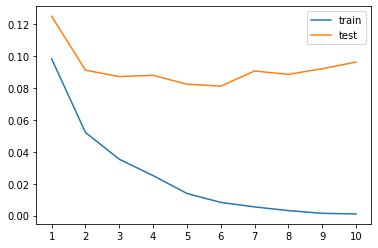

In [80]:
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_train, label='train')
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN5.epoch+1)));